In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

In [5]:
## The data is already properly formatted to use.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

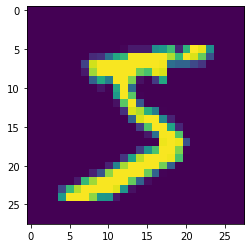

In [6]:
## Grap a single image.
single_image = x_train[0]
plt.imshow(single_image)

In [7]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_test = to_categorical(y_test, num_classes = 10)
y_cat_train = to_categorical(y_train, num_classes = 10)

In [13]:
## Map the values between 0 and 1.
x_train = x_train / 255
x_test = x_test / 255

In [14]:
## "batch_size", "width", "height", "color_channels"
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4, 4), strides = (1, 1), input_shape = (28, 28, 1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax")) ## Output layer. This is a multi class problem, "softmax" is being used.

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 1)

In [22]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3821 - accuracy: 0.8879 - val_loss: 0.3248 - val_accuracy: 0.9045
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2869 - accuracy: 0.9147 - val_loss: 0.2348 - val_accuracy: 0.9290
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2192 - accuracy: 0.9354 - val_loss: 0.1833 - val_accuracy: 0.9454
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1734 - accuracy: 0.9489 - val_loss: 0.1468 - val_accuracy: 0.9559
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1440 - accuracy: 0.9565 - val_loss: 0.1321 - val_accuracy: 0.9607
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1228 - accuracy: 0.9628 - val_loss: 0.1171 - val_accuracy: 0.9646
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1083 - accuracy: 0.9674 - val_loss: 0.1066 - val_ac

In [23]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

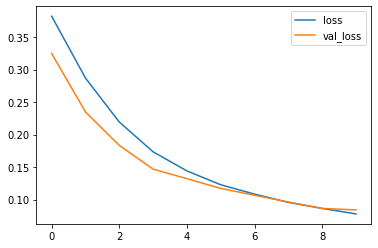

In [24]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

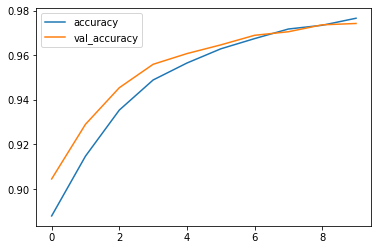

In [25]:
metrics[["accuracy", "val_accuracy"]].plot()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
import seaborn as sns

<AxesSubplot:>

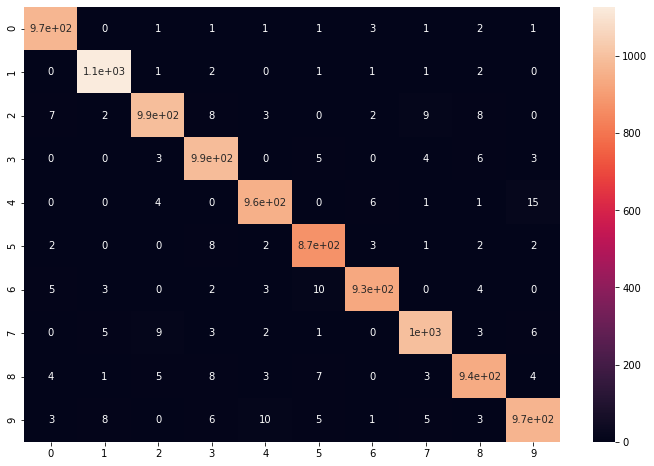

In [33]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

array([7])

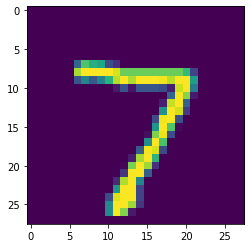

In [37]:
## Test the model with an image.
test_img = x_test[0]
plt.imshow(test_img.reshape(28, 28))
## The shape must be ("number_of_images", "width", "height", "color_channels")
model.predict_classes(test_img.reshape(1, 28, 28, 1))